In [1]:
#%%
# Step 1: Harris and Wolpert grid sweep across C_T, C_FR
#Here I try playing with the Harris & Wolpert 1998 model. 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import colour as clr
import sys
from IPython.display import Markdown
sys.path.insert(0,'parameterFiles')
%matplotlib widget 
#%config InlineBackend.figure_formats = ['svg']
import ReachingModels as reaching

sim = reaching.eyeHW2()

loop_dist = np.array([0.001, 0.01, 0.1,1,10])
loop_cfr = np.array([0.001,.01,.1,1,10])
#allocate for storage:durations, speeds, costs, rewards, solved --> 
M = len(loop_cfr)
N = len(loop_dist)
duration_vec  = np.zeros([M, N])
peakspeed_vec = np.zeros([M, N])
J             = np.zeros([M, N])
costFR        = np.zeros([M, N])
costWork      = np.zeros([M, N])
costTime      = np.zeros([M, N])
solved        = np.zeros([M, N])
distances     = np.zeros([M, N])
ct_vec        = np.zeros([M, N])
traj_bycfr    = list()

c_t   = 10
x     = 0.0

for i, c_fr in enumerate(loop_cfr):
  traj_inner = list()
  for j, dist in enumerate(loop_dist):
    optiPrev = sim.movementTimeOptSetup(
      theTimeValuation  = .1,
      theN              = 100, 
      theFRCoef         = c_fr)

    traj, optiOrig = sim.updateGuessAndSolve(
      optiPrev, 
      np.array([x]), 
      np.array([x]) + np.array([dist]),
      theDurationGuess    = 1.0,
      theTimeValuation    = c_t,
      theGeneratePlots    = 0,
      theFRCoef           = c_fr)
    duration_vec[i,j]  = traj.duration
    peakspeed_vec[i,j] = traj.vecspeed.max()
    J[i,j]             = traj.costJ
    costFR[i,j]        = traj.costFR
    costWork[i,j]      = traj.costWork
    costTime[i,j]      = traj.costTime
    solved[i,j]        = traj.solved
    distances[i,j]     = dist
    ct_vec[i,j]        = c_t
    traj_inner.append(traj)
  traj_bycfr.append(traj_inner)



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Caught: post-opti.solve() failed. Check either the first output, or the subsequent plotting code.



solution not found at 1,0 with c_fr = 0.01 and dist = 0.001


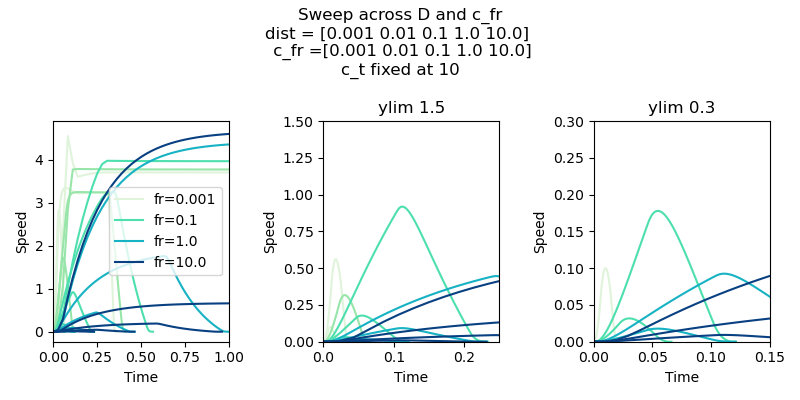

In [2]:

#%%
# create color gradient tvalcolors.
color1 = clr.Color("#e0f3db")
tvalcolors = list(color1.range_to(clr.Color("#084081"),len(loop_cfr)))

nsubplt = 3
fig,ax = plt.subplots(1,nsubplt)
subplot_height = 2
subplot_width = 2
pad_h = 2
pad_w = 1
# set fig width and height in cm
fig.set_size_inches(nsubplt*subplot_width+(nsubplt-1)*pad_w,subplot_height+pad_h)
# set fig top caption 

for i in range(len(traj_bycfr)):
  for j in range(len(traj_bycfr[i])):
    # current color is from tvalcolors
    c = tvalcolors[i].get_rgb()
    # only set a label for the first plot
    label = f'fr={loop_cfr[i]}'
    
    #make sure vecspeed is not length 1 or empty
    if len(traj_bycfr[i][j].vecspeed) == 1 or len(traj_bycfr[i][j].vecspeed) == 0:
      print(f'solution not found at {i},{j} with c_fr = {loop_cfr[i]} and dist = {loop_dist[j]}')
      continue
    else:
      if j == 0:
        ax[0].plot(traj_bycfr[i][j].time,traj_bycfr[i][j].vecspeed, color = c, label = label)
      else:
        ax[0].plot(traj_bycfr[i][j].time,traj_bycfr[i][j].vecspeed, color = c)
      
      ax[0].set_xlabel('Time')
      ax[0].set_ylabel('Speed')
      ax[0].set_xlim([0,1])

      ylimmax = 1.5
      if max(traj_bycfr[i][j].vecspeed) < ylimmax:      
        ax[1].plot(traj_bycfr[i][j].time,traj_bycfr[i][j].vecspeed, color = c)
        ylimmax = 1.5
        ax[1].set_title('ylim '+str(ylimmax))
        ax[1].set_xlabel('Time')
        ax[1].set_ylabel('Speed')
        ax[1].set_ylim([0,ylimmax])
        ax[1].set_xlim([0,.25])
      
      ylimmax = .3
      if max(traj_bycfr[i][j].vecspeed) < ylimmax:
        ax[2].plot(traj_bycfr[i][j].time,traj_bycfr[i][j].vecspeed, color = c)
        ax[2].set_title('ylim '+str(ylimmax))
        ax[2].set_xlabel('Time')
        ax[2].set_ylabel('Speed')
        ax[2].set_ylim([0,ylimmax])
        ax[2].set_xlim([0,.15])
    
#%%
# turn on legend for the first plot
ax[0].legend()
str_dist = [str(i) for i in loop_dist]
str_cfr = [str(i) for i in loop_cfr]
fig.suptitle('Sweep across D and c_fr'+ '\n' + 'dist = ['+' '.join(str_dist)+ '] \n'+' c_fr =['+' '.join(str_cfr)+']'+ '\n'+'c_t fixed at '+str(c_t), fontsize=12)
fig.tight_layout(h_pad=2,w_pad = 2)





The three largest c_fr (.1,1,10) make bell-shaped curves; below it starts to get pretty triangular.
### Second sweep: fixed c_fr, adjusted distances and c_t
Keeping c_fr = 0.1 fixed, now we look at effect of c_t (but keeping near c_t = 10).
Also, distances are kept the same

In [3]:
c_fr   = .1
loop_ct = np.array([1,10,20,30,40])
#allocate for storage:durations, speeds, costs, rewards, solved --> 
M = len(loop_ct)
N = len(loop_dist)
duration_vec  = np.zeros([M, N])
peakspeed_vec = np.zeros([M, N])
J             = np.zeros([M, N])
costFR        = np.zeros([M, N])
costWork      = np.zeros([M, N])
costTime      = np.zeros([M, N])
solved        = np.zeros([M, N])
distances     = np.zeros([M, N])
ct_vec        = np.zeros([M, N])
traj_bycfr    = list()

for i, c_t in enumerate(loop_ct):
  traj_inner = list()
  for j, dist in enumerate(loop_dist):
    optiPrev = sim.movementTimeOptSetup(
      theTimeValuation  = c_t,
      theN              = 100,   #2022-10: 20 and 40 both work flawlessly. this is after removing accel = 0 constraint. 
      theFRCoef         = c_fr)

    traj, optiOrig = sim.updateGuessAndSolve(
      optiPrev, 
      np.array([x]), 
      np.array([x]) + np.array([dist]),
      theDurationGuess    = 1.0,
      theTimeValuation    = c_t,
      theGeneratePlots    = 0,
      theFRCoef           = c_fr)
    duration_vec[i,j]  = traj.duration
    peakspeed_vec[i,j] = traj.vecspeed.max()
    J[i,j]             = traj.costJ
    costFR[i,j]        = traj.costFR
    costWork[i,j]      = traj.costWork
    costTime[i,j]      = traj.costTime
    solved[i,j]        = traj.solved
    distances[i,j]     = dist
    ct_vec[i,j]        = c_t
    traj_inner.append(traj)
  traj_bycfr.append(traj_inner)



No handles with labels found to put in legend.


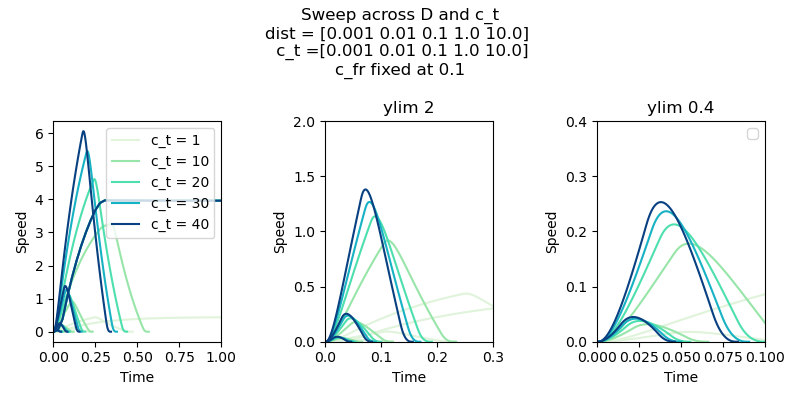

In [11]:

#%%
# create color gradient tvalcolors.
color1 = clr.Color("#e0f3db")
tvalcolors = list(color1.range_to(clr.Color("#084081"),len(loop_ct)))

nsubplt = 3
fig,ax = plt.subplots(1,nsubplt)
subplot_height = 2
subplot_width = 2
pad_h = 2
pad_w = 1
# set fig width and height in cm
fig.set_size_inches(nsubplt*subplot_width+(nsubplt-1)*pad_w,subplot_height+pad_h)
# set fig top caption 

for i in range(len(traj_bycfr)):
  for j in range(len(traj_bycfr[i])):
    # current color is from tvalcolors
    c = tvalcolors[i].get_rgb()
    # only set a label for the first plot
    label = f'c_t = {loop_ct[i]}'
    if len(traj_bycfr[i][j].vecspeed) == 1 or len(traj_bycfr[i][j].vecspeed) == 0:
      print(f'solution not found at {i},{j} with c_t = {loop_ct[i]} and dist = {loop_dist[j]}')
      continue
    else:
      if j == 0:
        ax[0].plot(traj_bycfr[i][j].time,traj_bycfr[i][j].vecspeed, color = c, label = label)
      else:
        ax[0].plot(traj_bycfr[i][j].time,traj_bycfr[i][j].vecspeed, color = c)
      
      ax[0].set_xlabel('Time')
      ax[0].set_ylabel('Speed')
      ax[0].set_xlim([0,1])

      ylimmax = 1.5
      if max(traj_bycfr[i][j].vecspeed) < ylimmax:      
        ax[1].plot(traj_bycfr[i][j].time,traj_bycfr[i][j].vecspeed, color = c)
        ylimmax = 2
        ax[1].set_title('ylim '+str(ylimmax))
        ax[1].set_xlabel('Time')
        ax[1].set_ylabel('Speed')
        ax[1].set_ylim([0,ylimmax])
        ax[1].set_xlim([0,0.3])
      
      ylimmax = .4
      if max(traj_bycfr[i][j].vecspeed) < ylimmax:
        # optionally create a label that is c_t and dist
        # label = f'c_t = {loop_ct[i]} d = {loop_dist[j]}'
        
        ax[2].plot(traj_bycfr[i][j].time,traj_bycfr[i][j].vecspeed, color = c)
        ax[2].set_title('ylim '+str(ylimmax))
        ax[2].set_xlabel('Time')
        ax[2].set_ylabel('Speed')
        ax[2].set_ylim([0,ylimmax])
        ax[2].set_xlim([0,.1])
    
    
#%%
# turn on legend for the first plot
ax[0].legend()
ax[2].legend()
str_dist = [str(i) for i in loop_dist]
str_ct = [str(i) for i in loop_cfr]
fig.suptitle('Sweep across D and c_t'+ '\n' + 'dist = ['+' '.join(str_dist)+ '] \n'+' c_t =['+' '.join(str_ct)+']'+ '\n'+'c_fr fixed at '+str(c_fr), fontsize=12)
fig.tight_layout(h_pad=2,w_pad = 2)

In [12]:
markdown_text = f"""
# Summary

given distances: {str_dist}, time valuations (by inspection, hard coded here) above about 10 seem to produce bell shaped speed profiles consistently. 

At lower time valuations, the speed profiles look shark-toothed, or become step-functions.
"""

Markdown(markdown_text)



# Summary

given distances: ['0.001', '0.01', '0.1', '1.0', '10.0'], time valuations (by inspection, hard coded here) above about 10 seem to produce bell shaped speed profiles consistently. 

At lower time valuations, the speed profiles look shark-toothed, or become step-functions.
